In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os
from matplotlib.font_manager import FontProperties
import numpy as np

In [2]:
font_path = os.path.join("..", "kaiu.ttf")
myfont = FontProperties(fname= font_path, size=14)
sns.set(font = myfont.get_name())

plt.rcParams['figure.figsize'] = (10,5)

In [3]:
csv_path = os.path.join("..", "data","TSR_CMUH", "followtime_12.csv")
followtime12 = pd.read_csv(csv_path)
followtime12.head()

,INDEX,ICASE_ID,SEX,AGE,IH_DT,ICD_ID,ICDTIA_ID,NIHSS_IN,NIHSS_OUT,BARTHEL,mRS_0,mRS_1,mRS_3,mRS_6,mRS_12
0,1,104,0,67,2006/10/14,1.0,NaN,4,4,100,1,1,1,1,1
1,2,104,0,69,2008/4/10,1.0,NaN,0,1,100,1,1,0,0,0
2,3,104,0,71,2010/11/8,1.0,NaN,0,2,100,0,0,0,0,0
3,4,104,0,71,2011/1/12,2.0,2.0,1,0,100,0,0,0,0,0
4,5,205,1,59,2010/6/17,3.0,NaN,2,2,0,5,5,5,5,4


In [4]:
followtime12.describe()

,INDEX,ICASE_ID,SEX,AGE,ICD_ID,ICDTIA_ID,NIHSS_IN,NIHSS_OUT,BARTHEL,mRS_0,mRS_1,mRS_3,mRS_6,mRS_12
count,2792.0000,2792.000000,2792.000000,2792.000000,2771.000000,300.000000,2792.000000,2792.000000,2792.000000,2792.000000,2792.000000,2792.00000,2792.000000,2792.000000
mean,1396.5000,31954.889685,0.608166,63.896490,1.821003,1.443333,11.609957,8.660458,71.144341,2.351719,2.265759,2.06447,1.954513,1.882163
std,806.1253,16658.659000,0.488247,13.320957,5.304287,0.497609,24.557629,20.951156,33.360236,1.493160,1.575839,1.58192,1.595545,1.655391
min,1.0000,104.000000,0.000000,12.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000
25%,698.7500,29967.500000,0.000000,55.000000,1.000000,1.000000,2.000000,1.000000,50.000000,1.000000,1.000000,1.00000,1.000000,1.000000
50%,1396.5000,30937.500000,1.000000,65.000000,1.000000,1.000000,5.000000,4.000000,90.000000,2.000000,2.000000,2.00000,1.000000,1.000000
75%,2094.2500,31853.250000,1.000000,74.000000,2.000000,2.000000,10.000000,7.000000,100.000000,4.000000,4.000000,3.00000,3.000000,3.000000
max,2792.0000,133323.000000,1.000000,96.000000,99.000000,2.000000,215.000000,213.000000,100.000000,5.000000,5.000000,5.00000,5.000000,5.000000


# SEX

1    0.608166
0    0.391834
Name: SEX, dtype: float64


C:\Users\Jacky C\Anaconda3\envs\tsr_ml\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


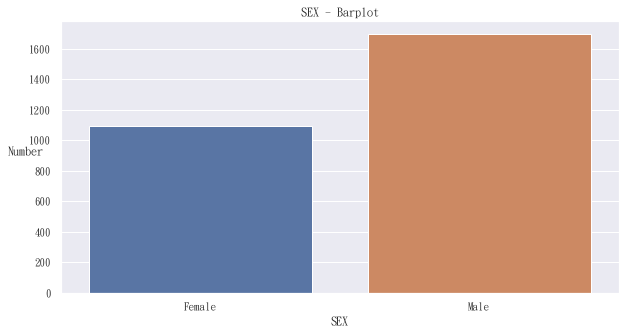

In [5]:
sex = followtime12.loc[:,"SEX"]
#print(sex)
print(sex.value_counts() / len(sex))
#print(sex.describe())

sex_labels = ["Female","Male"]
sns.countplot(sex).set_xticklabels(sex_labels)
plt.title("SEX - Barplot")
plt.xlabel('SEX')
plt.ylabel('Number', rotation=0)
plt.show()

# AGE

count    2792.000000
mean       63.896490
std        13.320957
min        12.000000
25%        55.000000
50%        65.000000
75%        74.000000
max        96.000000
Name: AGE, dtype: float64


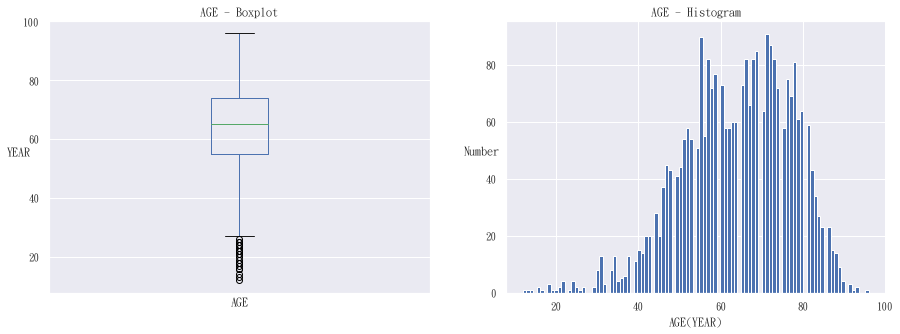

In [6]:
age = followtime12.loc[:,"AGE"]
#print(age)
#print(age.value_counts()len(age))
print(age.describe())

fig, (ax1,ax2) = plt.subplots(nrows = 1, ncols = 2, figsize = (15,5))

age.plot.box(ax = ax1)
ax1.set_title("AGE - Boxplot")
ax1.set_xlabel('AGE')
ax1.set_ylabel('YEAR', rotation=0)
ax1.set_xticks([])

#age.plot.hist(ax = ax2, bins=100)
#plt.show()
age.plot.hist(ax = ax2, bins=100)
ax2.set_title("AGE - Histogram")
ax2.set_xlabel('AGE(YEAR)')
ax2.set_ylabel('Number', rotation=0)
plt.show()

# ICD_ID

1.0     0.686605
3.0     0.162966
2.0     0.106017
4.0     0.034026
99.0    0.002865
Name: ICD_ID, dtype: float64


C:\Users\Jacky C\Anaconda3\envs\tsr_ml\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


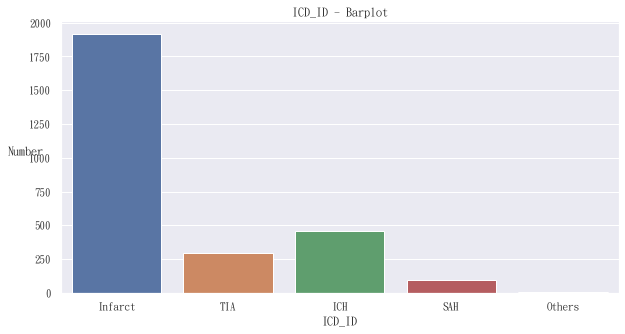

In [7]:
icd_id = followtime12.loc[:,"ICD_ID"]
#print(icd_id)
print(icd_id.value_counts() / len(icd_id))
#print(icd_id.describe())

icd_id_labels = ["Infarct","TIA", "ICH", "SAH", "Others"]
sns.countplot(icd_id).set_xticklabels(icd_id_labels)
plt.title("ICD_ID - Barplot")
plt.xlabel('ICD_ID')
plt.ylabel('Number', rotation=0)
plt.show()

# ICDTIA_ID

1.0    0.059814
2.0    0.047636
Name: ICDTIA_ID, dtype: float64


C:\Users\Jacky C\Anaconda3\envs\tsr_ml\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


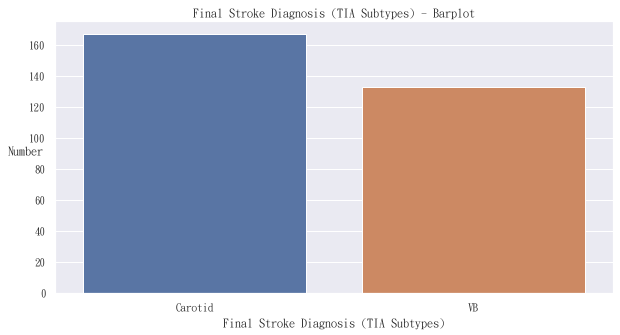

In [8]:
icdtia_id = followtime12.loc[:,"ICDTIA_ID"]
#print(icdtia_id)
print(icdtia_id.value_counts() / len(icdtia_id))
#print(icdtia_id.describe())

icdtia_id_labels = ["Carotid","VB"]
sns.countplot(icdtia_id).set_xticklabels(icdtia_id_labels)
plt.title("Final Stroke Diagnosis (TIA Subtypes) - Barplot")
plt.xlabel('Final Stroke Diagnosis (TIA Subtypes)')
plt.ylabel('Number', rotation=0)
plt.show()

# NIHSS IN

count    2792.000000
mean       11.609957
std        24.557629
min         0.000000
25%         2.000000
50%         5.000000
75%        10.000000
max       215.000000
Name: NIHSS_IN, dtype: float64


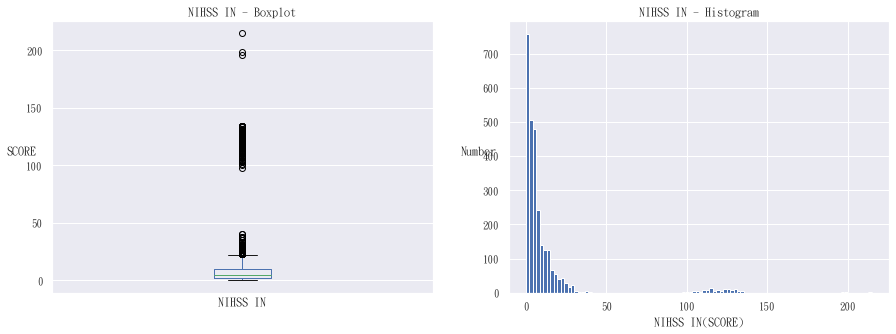

In [9]:
nihssin = followtime12.loc[:,"NIHSS_IN"]
#print(nihssin)
#print(nihssin.value_counts()len(nihssin))
print(nihssin.describe())

fig, (ax1,ax2) = plt.subplots(nrows = 1, ncols = 2, figsize = (15,5))

nihssin.plot.box(ax = ax1)
ax1.set_title("NIHSS IN - Boxplot")
ax1.set_xlabel('NIHSS IN')
ax1.set_ylabel('SCORE', rotation=0)
ax1.set_xticks([])

#nihssin.plot.hist(ax = ax2, bins=100)
#plt.show()
nihssin.plot.hist(ax = ax2, bins=100)
ax2.set_title("NIHSS IN - Histogram")
ax2.set_xlabel('NIHSS IN(SCORE)')
ax2.set_ylabel('Number', rotation=0)
plt.show()

# NIHSS OUT

count    2792.000000
mean        8.660458
std        20.951156
min         0.000000
25%         1.000000
50%         4.000000
75%         7.000000
max       213.000000
Name: NIHSS_OUT, dtype: float64


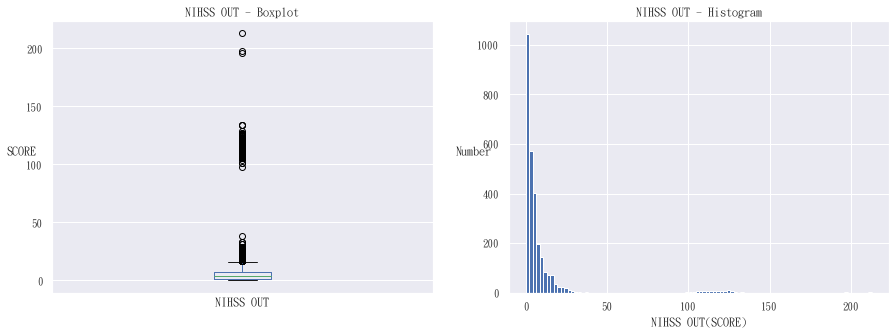

In [10]:
nihssout = followtime12.loc[:,"NIHSS_OUT"]
#print(nihssout)
#print(nihssout.value_counts()len(nihssout))
print(nihssout.describe())

fig, (ax1,ax2) = plt.subplots(nrows = 1, ncols = 2, figsize = (15,5))

nihssout.plot.box(ax = ax1)
ax1.set_title("NIHSS OUT - Boxplot")
ax1.set_xlabel('NIHSS OUT')
ax1.set_ylabel('SCORE', rotation=0)
ax1.set_xticks([])

#nihssout.plot.hist(ax = ax2, bins=100)
#plt.show()
nihssout.plot.hist(ax = ax2, bins=100)
ax2.set_title("NIHSS OUT - Histogram")
ax2.set_xlabel('NIHSS OUT(SCORE)')
ax2.set_ylabel('Number', rotation=0)
plt.show()

# BARTHEL

count    2792.000000
mean       71.144341
std        33.360236
min         0.000000
25%        50.000000
50%        90.000000
75%       100.000000
max       100.000000
Name: BARTHEL, dtype: float64


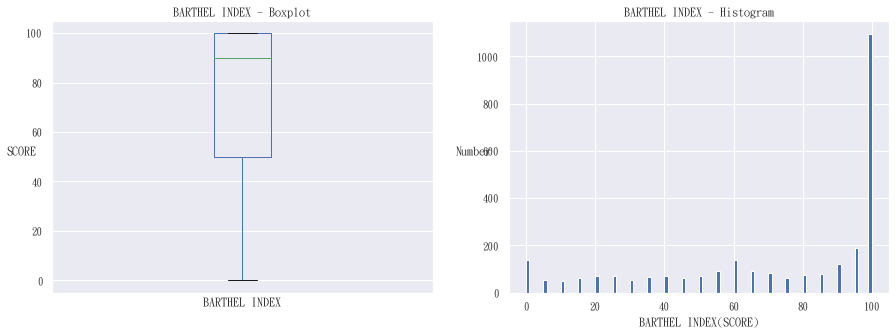

In [11]:
barthel = followtime12.loc[:,"BARTHEL"]
#print(barthel)
#print(barthel.value_counts()len(barthel))
print(barthel.describe())

fig, (ax1,ax2) = plt.subplots(nrows = 1, ncols = 2, figsize = (15,5))

barthel.plot.box(ax = ax1)
ax1.set_title("BARTHEL INDEX - Boxplot")
ax1.set_xlabel('BARTHEL INDEX')
ax1.set_ylabel('SCORE', rotation=0)
ax1.set_xticks([])

#barthel.plot.hist(ax = ax2, bins=100)
#plt.show()
barthel.plot.hist(ax = ax2, bins=100)
ax2.set_title("BARTHEL INDEX - Histogram")
ax2.set_xlabel('BARTHEL INDEX(SCORE)')
ax2.set_ylabel('Number', rotation=0)
plt.show()

# mRS_0

1    0.248209
4    0.204155
2    0.194842
3    0.170129
0    0.105301
5    0.077364
Name: mRS_0, dtype: float64


C:\Users\Jacky C\Anaconda3\envs\tsr_ml\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


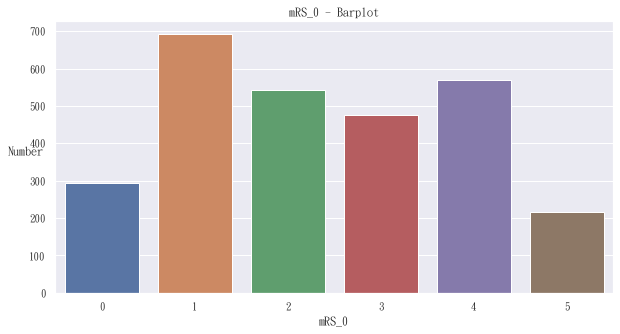

In [12]:
mrs0 = followtime12.loc[:,"mRS_0"]
#print(mrs0)
print(mrs0.value_counts() / len(mrs0))
#print(mrs0.describe())

sns.countplot(mrs0)
plt.title("mRS_0 - Barplot")
plt.xlabel('mRS_0')
plt.ylabel('Number', rotation=0)
plt.show()

# mRS_1

1    0.296562
4    0.183023
2    0.159742
3    0.139327
0    0.121418
5    0.099928
Name: mRS_1, dtype: float64


C:\Users\Jacky C\Anaconda3\envs\tsr_ml\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


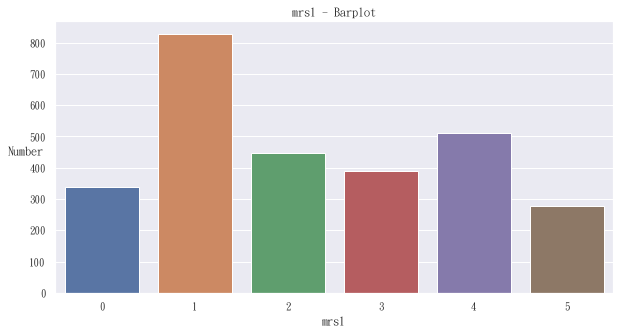

In [13]:
mrs1 = followtime12.loc[:,"mRS_1"]
#print(mrs1)
print(mrs1.value_counts() / len(mrs1))
#print(mrs1.describe())

sns.countplot(mrs1)
plt.title("mrs1 - Barplot")
plt.xlabel('mrs1')
plt.ylabel('Number', rotation=0)
plt.show()

# mRS_3

C:\Users\Jacky C\Anaconda3\envs\tsr_ml\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


1    0.320201
0    0.160100
4    0.143983
2    0.142908
3    0.140759
5    0.092049
Name: mRS_3, dtype: float64


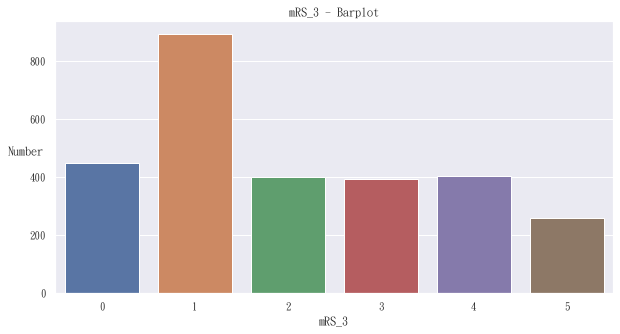

In [14]:
mrs3 = followtime12.loc[:,"mRS_3"]
#print(mrs3)
print(mrs3.value_counts() / len(mrs3))
#print(mrs3.describe())

sns.countplot(mrs3)
plt.title("mRS_3 - Barplot")
plt.xlabel('mRS_3')
plt.ylabel('Number', rotation=0)
plt.show()

# mRS_6

C:\Users\Jacky C\Anaconda3\envs\tsr_ml\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


1    0.333095
0    0.186963
3    0.134312
2    0.128223
4    0.125000
5    0.092407
Name: mRS_6, dtype: float64


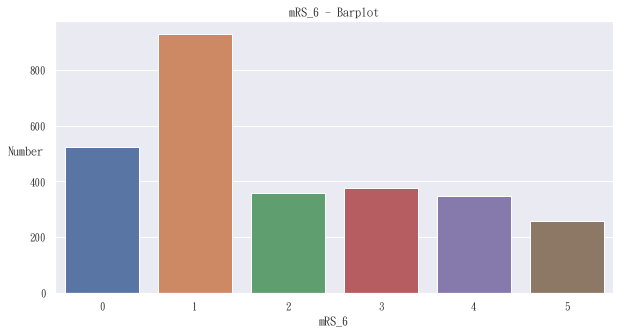

In [15]:
mrs6 = followtime12.loc[:,"mRS_6"]
#print(mrs6)
print(mrs6.value_counts() / len(mrs6))
#print(mrs6.describe())

sns.countplot(mrs6)
plt.title("mRS_6 - Barplot")
plt.xlabel('mRS_6')
plt.ylabel('Number', rotation=0)
plt.show()

# mRS_12

C:\Users\Jacky C\Anaconda3\envs\tsr_ml\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


1    0.321991
0    0.225645
2    0.127865
4    0.119628
5    0.105659
3    0.099212
Name: mRS_12, dtype: float64


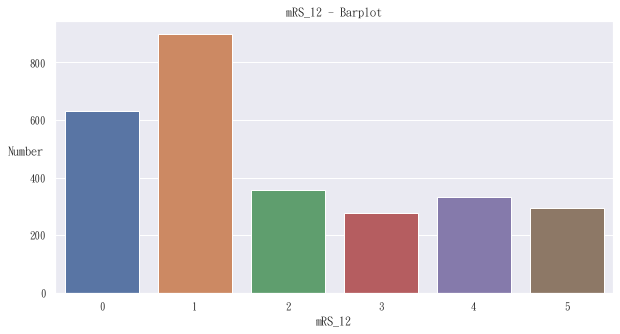

In [16]:
mrs12 = followtime12.loc[:,"mRS_12"]
#print(mrs12)
print(mrs12.value_counts() / len(mrs12))
#print(mrs12.describe())

sns.countplot(mrs12)
plt.title("mRS_12 - Barplot")
plt.xlabel('mRS_12')
plt.ylabel('Number', rotation=0)
plt.show()